# Inspecting Your Data in Python, Part 1: Uniform Curvilinear Grids

In this notebook, we open a GRMHD simulation run on a uniform curvilinear grid in Python and inspect the structure of the data. We show how this can give you insight into what the data is doing and how you can make some simple plots.

## Matplotlib and h5py

### HDF5

HDF5 is an output library. It supports outputting in serial or in parallel. It spits out compact (even compressed!) binary data and it is self-describing. A single file can have many datasets, and even a whole internal directory structure. It has a convenient Python API. It's a common output format used by the Einstein Toolkit and I highly recomend you get familiar with it.

### Matplotlib

Matplotlib is just an excellent plotting library in Python.

In [1]:
%matplotlib inline
import h5py
import numpy as np
from matplotlib import pyplot as plt

## Loading your data

Here I have prepared two files for you. One contains the coordinate data describing the grid the simulation was run on. The other contains a number of interesting physical quantities. I could leave this data on disk (if it was too large to load into memory or if I wanted to exploit parallelism). But instead, I'll just open the files, read the data in, and then close the files.

Each dataset in the hdf5 file has a name, which I'm storing as the key in a dictionary.

In [7]:
grid = {}
with h5py.File('harmdisk2d/grid.h5','r') as f:
    for k,v in f.items():
        grid[k] = v.value
data = {}
with h5py.File('harmdisk2d/data.h5','r') as f:
    for k,v in f.items():
        data[k] = v.value

Let's look at what we have

In [12]:
list(grid.keys())

['Lambda_bl2cart_con',
 'Lambda_bl2cart_cov',
 'Lambda_h2bl_con',
 'Lambda_h2bl_cov',
 'Lambda_h2cart_con',
 'Lambda_h2cart_cov',
 'XFcart',
 'XFharm',
 'Xbl',
 'Xcart',
 'Xharm',
 'alpha',
 'gcon',
 'gcov',
 'gdet']

In [13]:
list(data.keys())

['ENT',
 'L_unit',
 'M_unit',
 'Mbh',
 'N1tot',
 'N2tot',
 'N3tot',
 'PRESS',
 'RHO_unit',
 'Reh',
 'Rout',
 'Rout_vis',
 'TEMP',
 'TEMP_unit',
 'T_unit',
 'U_unit',
 'a',
 'cour',
 'dt',
 'dx[1]',
 'dx[2]',
 'dx[3]',
 'mbh',
 'startx[1]',
 'startx[2]',
 'startx[3]',
 't',
 'tf',
 'version']

You can investigate a variable now as a numpy array. For example:

In [15]:
data['mbh'],data['N1tot'],data['N2tot'],data['N3tot']

(array([ 3.]),
 array([112], dtype=int32),
 array([112], dtype=int32),
 array([1], dtype=int32))

In [16]:
data['PRESS'][56:68,56:68,0]

array([[ 0.02398035,  0.02395611,  0.02392389,  0.0238833 ,  0.02383693,
         0.02378612,  0.02372727,  0.02365689,  0.02357242,  0.02347589,
         0.02335989,  0.02322777],
       [ 0.01843062,  0.01841522,  0.01839717,  0.01837354,  0.01834161,
         0.01830356,  0.01825713,  0.01820202,  0.01813658,  0.01805765,
         0.0179665 ,  0.01785848],
       [ 0.01400762,  0.01399931,  0.01398676,  0.01397116,  0.01395105,
         0.013927  ,  0.01389786,  0.01386419,  0.0138267 ,  0.01378457,
         0.01373317,  0.01367202],
       [ 0.01041501,  0.01040995,  0.01040209,  0.01039151,  0.01037879,
         0.01036408,  0.01034422,  0.01032318,  0.01029572,  0.01026496,
         0.01022652,  0.01018305],
       [ 0.00760256,  0.00759854,  0.00759234,  0.00758409,  0.00757365,
         0.00756011,  0.00754391,  0.00752429,  0.00750111,  0.00747272,
         0.00743971,  0.00740112],
       [ 0.00540303,  0.0053982 ,  0.00539235,  0.00538529,  0.00537701,
         0.00536711,  

### Exercise

Explore the data and see what information you can extract about what this simulation was and what the parameters of it were.

## Simple Plots

Matplotlib can create simple 2D heatmaps with Cartesian topology fairly easily. This simulation was run with curvilinear coordinates, however. So if we want to use this feature, we either need to do some work, or we need to plot in $r,\theta$ coordinates:

Text(0,0.5,'$\\theta$')

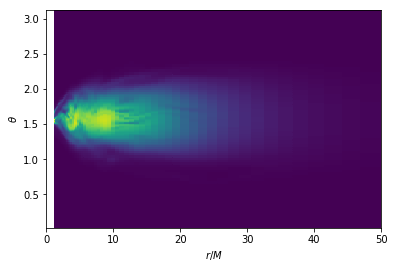

In [25]:
r = grid['Xbl'][:,:,0,1]
theta = grid['Xbl'][:,:,0,2]
P = data['PRESS'][:,:,0]
plt.pcolor(r,theta,P)
plt.xlim(0,50)
plt.xlabel(r'$r/M$')
plt.ylabel(r'$\theta$')

### Exercise

Can you use the data available in these files to generate a 2D plot in Cartesian coordinates?